<a href="https://colab.research.google.com/github/snr131/Data-Analytics-Microcredential/blob/projects/NYS_Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data includes initial unemployment claims, the period end date, and region within New York state. I have a few questions:

# 1.   What are the start and end dates?

This dataset starts on July 31, 2003 and ends on December 31, 2020.

# 2.   Which regions have the higest initial claims per year?

Including 2020 data, after New York City, Long Island followed by Hudson Valley, have the highest unemployment claims. 

# 3.   Which years have the highest initial claims?

After 2020, 2009 had the highest number of initial claims.

# 4.   Using regression analysis, forecast upward or downward initial claims.

With 2020 data included (which has an impact on the mean and therefore the regression), there is an upward trend in claims. Without 2020 data, there is a downward trend. The regression analysis considered New York City separately and grouped together all other regions.



In [1]:
# import pandas, matplotlib, and seaborn for exploratory data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/School/Microcredential/Class Materials/Day 19/Unemployment_Insurance_Initial_Claims_By_Region_By_Month__Beginning_2003.csv')

In [3]:
# the data is organized into three columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Period Ending   2100 non-null   object
 1   Region          2100 non-null   object
 2   Initial Claims  2100 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 49.3+ KB


In [4]:
df.head()

,Period Ending,Region,Initial Claims
0,07/31/2003,Capital,4326
1,07/31/2003,Central New York,4366
2,07/31/2003,Finger Lakes,7095
3,07/31/2003,Hudson Valley,8454
4,07/31/2003,Long Island,13575


In [16]:
# to assist filtering by year, convert the "Period Ending" column into pandas datetime, and add columns to show day, month, and year
df['Period Ending'] = pd.to_datetime(df['Period Ending'])
df['Day'] = df['Period Ending'].apply(lambda time: time.day)
df['Month'] = df['Period Ending'].apply(lambda time: time.month)
df['Year'] = df['Period Ending'].apply(lambda time: time.year)

In [17]:
df.head(5)

,Period Ending,Region,Initial Claims,Day,Month,Year
0,2003-07-31,Capital,4326,31,7,2003
1,2003-07-31,Central New York,4366,31,7,2003
2,2003-07-31,Finger Lakes,7095,31,7,2003
3,2003-07-31,Hudson Valley,8454,31,7,2003
4,2003-07-31,Long Island,13575,31,7,2003


In [18]:
# the start date is July 31, 2003
min(df['Period Ending'])

Timestamp('2003-07-31 00:00:00')

In [19]:
# the end date is December 31, 2020
max(df['Period Ending'])

Timestamp('2020-12-31 00:00:00')

Text(0.5, 1.0, 'Claims Over Time')

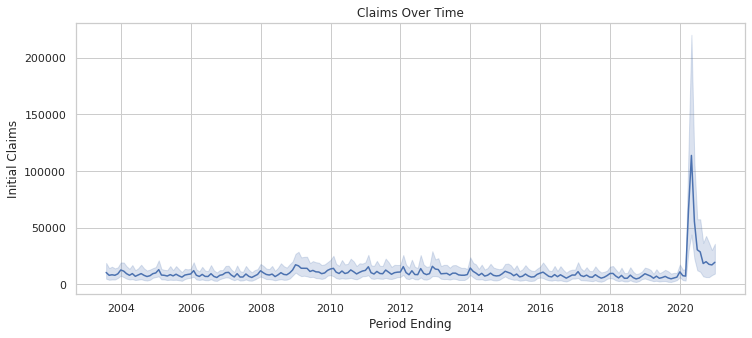

In [25]:
# use seaborn to show how NYS claims vary by year
# it's clear that initial claims increased significantly in 2020
sns.set_theme(style="whitegrid")
plt.figure(figsize = (12, 5))
sns.lineplot(data = df, x = 'Period Ending', y = 'Initial Claims' ).set_title('Claims Over Time')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

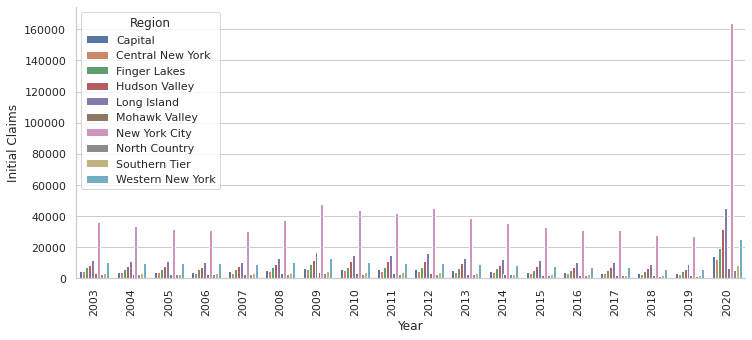

In [26]:
# use seaborn to show how initial claims fluctuation by year, by region
# it's clear that initial claims are higher in the New York City region, especially in 2020 
fig, ax1 = plt.subplots(figsize=(12, 5))
tidy = df.melt(id_vars='Year').rename(columns=str.title)
sns.barplot(x='Year', y=df['Initial Claims'], hue=df['Region'], data=tidy, ax=ax1, ci=False)
sns.despine(fig)
plt.xticks(rotation=90)

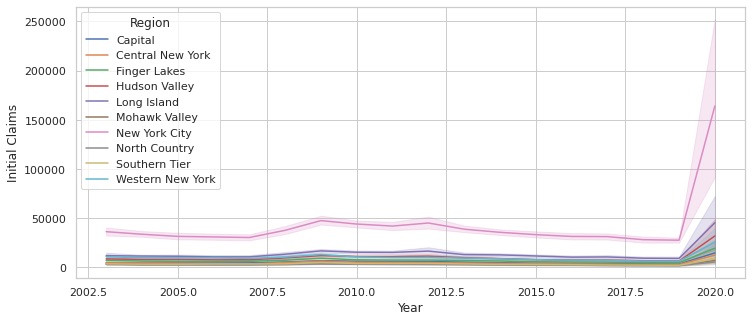

In [27]:
# another visual showing the same data
plt.figure(figsize = (12, 5))
sns.lineplot(x="Year", y="Initial Claims",
             hue="Region",
             data=df)

In [12]:
# it might be helpful to view New York City data separately from upstate regions
dfnyc = df[df['Region'] == 'New York City']
yearbyyear_dfnyc = dfnyc.groupby(['Year']).agg({'Initial Claims': sum})
print(yearbyyear_dfnyc)

      Initial Claims
Year                
2003          217512
2004          403694
2005          377583
2006          370612
2007          363771
2008          451660
2009          570137
2010          527923
2011          503450
2012          540750
2013          465366
2014          427069
2015          398573
2016          376963
2017          374449
2018          337348
2019          330701
2020         1968836


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

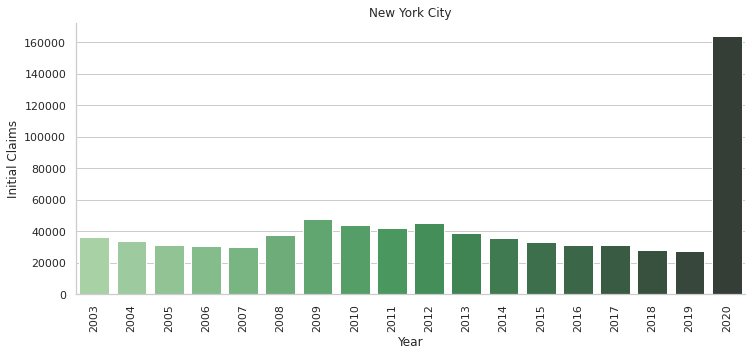

In [28]:
# again, it's clear that initial claims are significantly higher in 2020
fig, ax1 = plt.subplots(figsize=(12, 5))
tidy = dfnyc.melt(id_vars='Year').rename(columns=str.title)
sns.barplot(x=dfnyc['Year'], y=dfnyc['Initial Claims'], data=tidy, ax=ax1, ci=False, palette="Greens_d").set_title('New York City')
sns.despine(fig)
plt.xticks(rotation=90)

[datetime.date(2002, 5, 30), datetime.date(2005, 2, 23), datetime.date(2007, 11, 20), datetime.date(2010, 8, 16), datetime.date(2013, 5, 12), datetime.date(2016, 2, 6), datetime.date(2018, 11, 2), datetime.date(2021, 7, 29)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0, 0, '2002-05-30'),
 Text(0, 0, '2005-02-23'),
 Text(0, 0, '2007-11-20'),
 Text(0, 0, '2010-08-16'),
 Text(0, 0, '2013-05-12'),
 Text(0, 0, '2016-02-06'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2021-07-29')]

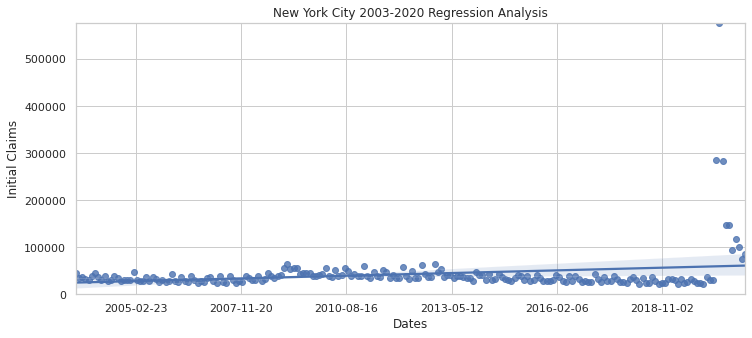

In [32]:
# including 2020 data, using a regression analysis, New York City has an upward initial claim trend
import datetime
dfnyc['ordinal_date'] = dfnyc['Period Ending'].apply(lambda x: x.toordinal())
plt.figure(figsize = (12, 5))
ax = sns.regplot(
    data=dfnyc,
    x='ordinal_date',
    y='Initial Claims',
)

ax.set_xlim(dfnyc['ordinal_date'].min() - 1, dfnyc['ordinal_date'].max() + 1)
ax.set_ylim(0, dfnyc['Initial Claims'].max() + 1)

ax.set_xlabel('Dates')
ax.set_title('New York City 2003-2020 Regression Analysis')
new_labels = [datetime.date.fromordinal(int(item)) for item in ax.get_xticks()]
print(new_labels)
ax.set_xticklabels(new_labels)

[datetime.date(2002, 5, 30), datetime.date(2005, 2, 23), datetime.date(2007, 11, 20), datetime.date(2010, 8, 16), datetime.date(2013, 5, 12), datetime.date(2016, 2, 6), datetime.date(2018, 11, 2), datetime.date(2021, 7, 29)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

[Text(0, 0, '2002-05-30'),
 Text(0, 0, '2005-02-23'),
 Text(0, 0, '2007-11-20'),
 Text(0, 0, '2010-08-16'),
 Text(0, 0, '2013-05-12'),
 Text(0, 0, '2016-02-06'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2021-07-29')]

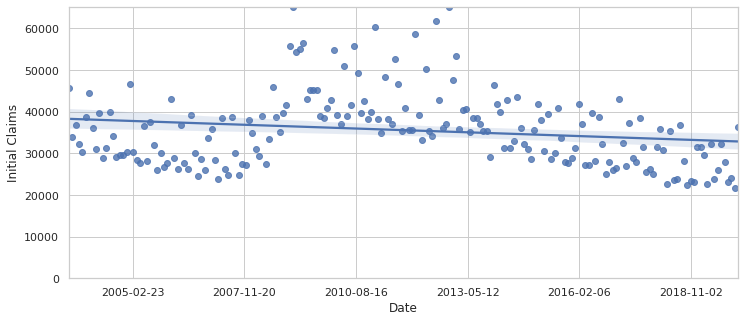

In [35]:
# NOT including 2020 data, using a regression analysis, New York City has an downward initial claim trend
nycdf2 = df[df['Region'] == 'New York City']
nycdf2['year'] = pd.DatetimeIndex(nycdf2['Period Ending']).year
nycdf2.drop(nycdf2[nycdf2['year'] >= 2020].index, inplace = True) 
nycdf2['ordinal_date'] = nycdf2['Period Ending'].apply(lambda x: x.toordinal())

import datetime
plt.figure(figsize = (12, 5))
ax2 = sns.regplot(
    data=nycdf2,
    x='ordinal_date',
    y='Initial Claims',
)
# Tighten up the axes for prettiness
ax2.set_xlim(nycdf2['ordinal_date'].min() - 1, nycdf2['ordinal_date'].max() + 1)
ax2.set_ylim(0, nycdf2['Initial Claims'].max() + 1)

ax2.set_xlabel('Date')
ax.set_title('New York City 2003-2019 Regression Analysis')
new_labels = [datetime.date.fromordinal(int(item)) for item in ax2.get_xticks()]
print(new_labels)
ax2.set_xticklabels(new_labels)

In [33]:
# for the purposes of this analysis, "upstate" includes all areas outside New York City
dfupstate = df[df['Region'] != 'New York City']
yearbyyear_dfupstate = dfupstate.groupby(['Year']).agg({'Initial Claims': sum})
print(yearbyyear_dfupstate)

      Initial Claims
Year                
2003          345621
2004          637996
2005          624660
2006          608321
2007          606438
2008          725591
2009          916216
2010          797698
2011          780518
2012          796309
2013          693413
2014          643574
2015          579377
2016          539916
2017          526176
2018          475005
2019          459329
2020         2043986


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

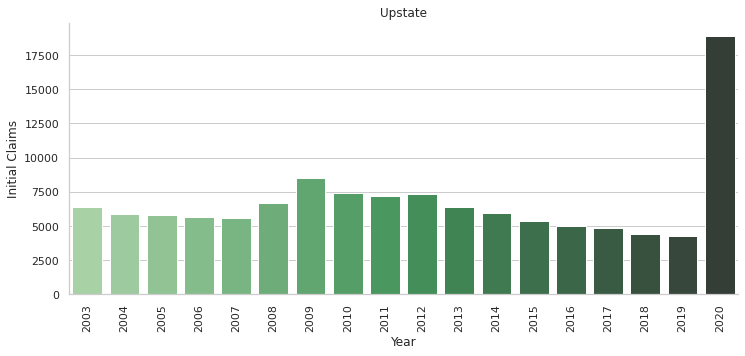

In [36]:
# again, it's clear that initial claims are significantly higher in 2020
fig, ax1 = plt.subplots(figsize=(12, 5))
tidy = dfupstate.melt(id_vars='Year').rename(columns=str.title)
sns.barplot(x=dfupstate['Year'], y=dfupstate['Initial Claims'], data=tidy, ax=ax1, ci=False, palette="Greens_d").set_title('Upstate')
sns.despine(fig)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[datetime.date(2002, 5, 30), datetime.date(2005, 2, 23), datetime.date(2007, 11, 20), datetime.date(2010, 8, 16), datetime.date(2013, 5, 12), datetime.date(2016, 2, 6), datetime.date(2018, 11, 2), datetime.date(2021, 7, 29)]


[Text(0, 0, '2002-05-30'),
 Text(0, 0, '2005-02-23'),
 Text(0, 0, '2007-11-20'),
 Text(0, 0, '2010-08-16'),
 Text(0, 0, '2013-05-12'),
 Text(0, 0, '2016-02-06'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2021-07-29')]

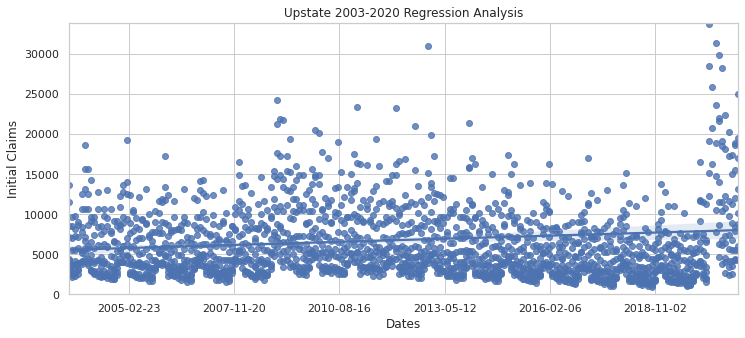

In [38]:
# including 2020 data, using a regression analysis, Upstate has an upward initial claim trend
dfupstate['ordinal_date'] = dfupstate['Period Ending'].apply(lambda x: x.toordinal())
plt.figure(figsize = (12, 5))
ax = sns.regplot(
    data=dfupstate,
    x='ordinal_date',
    y='Initial Claims',
)

ax.set_xlim(dfupstate['ordinal_date'].min() - 1, dfupstate['ordinal_date'].max() + 1)
ax.set_ylim(0, dfupstate['Initial Claims'].mean() * 5)

ax.set_xlabel('Dates')
ax.set_title('Upstate 2003-2020 Regression Analysis')
new_labels = [datetime.date.fromordinal(int(item)) for item in ax.get_xticks()]
print(new_labels)
ax.set_xticklabels(new_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

[datetime.date(2002, 5, 30), datetime.date(2005, 2, 23), datetime.date(2007, 11, 20), datetime.date(2010, 8, 16), datetime.date(2013, 5, 12), datetime.date(2016, 2, 6), datetime.date(2018, 11, 2), datetime.date(2021, 7, 29)]


[Text(0, 0, '2002-05-30'),
 Text(0, 0, '2005-02-23'),
 Text(0, 0, '2007-11-20'),
 Text(0, 0, '2010-08-16'),
 Text(0, 0, '2013-05-12'),
 Text(0, 0, '2016-02-06'),
 Text(0, 0, '2018-11-02'),
 Text(0, 0, '2021-07-29')]

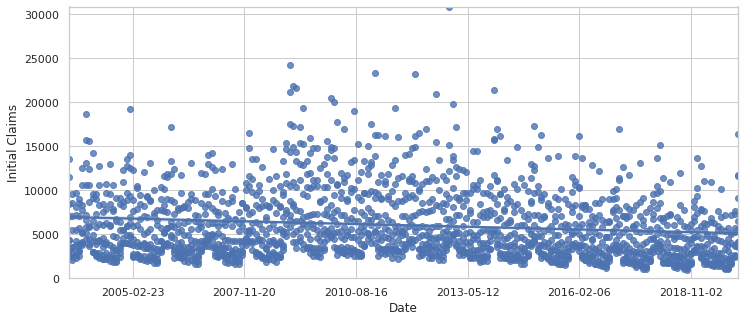

In [39]:
# NOT including 2020 data, using a regression analysis, Upstate has an downward initial claim trend
upstatedf2 = df[df['Region'] != 'New York City']
upstatedf2['year'] = pd.DatetimeIndex(upstatedf2['Period Ending']).year
upstatedf2.drop(upstatedf2[upstatedf2['year'] >= 2020].index, inplace = True) 
upstatedf2['ordinal_date'] = upstatedf2['Period Ending'].apply(lambda x: x.toordinal())

import datetime
plt.figure(figsize = (12, 5))
ax2 = sns.regplot(
    data=upstatedf2,
    x='ordinal_date',
    y='Initial Claims',
)
# Tighten up the axes for prettiness
ax2.set_xlim(upstatedf2['ordinal_date'].min() - 1, upstatedf2['ordinal_date'].max() + 1)
ax2.set_ylim(0, upstatedf2['Initial Claims'].max() + 1)

ax2.set_xlabel('Date')
ax.set_title('Upstate 2003-2019 Regression Analysis')
new_labels = [datetime.date.fromordinal(int(item)) for item in ax2.get_xticks()]
print(new_labels)
ax2.set_xticklabels(new_labels)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

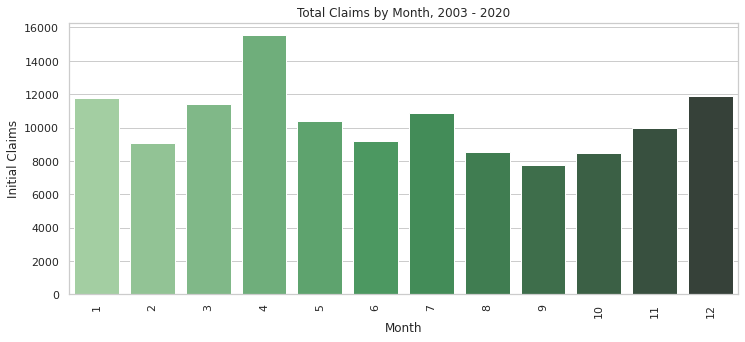

In [41]:
# if we plot the claims by month, and if we include 2020 data, April shows the highest initial claims
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = 'Month', y = 'Initial Claims', ci=False, palette="Greens_d").set_title('Total Claims by Month, 2003 - 2020')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

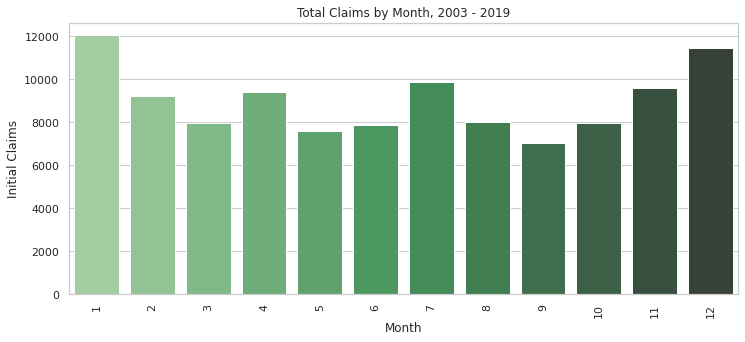

In [42]:
# if we plot the claims by month, and if we do NOT include 2020 data, December and January show the highest initial claims

sns.set(style="whitegrid")
df.drop(df[df['Year'] >= 2020].index, inplace = True)
plt.figure(figsize = (12, 5))
#data = df.groupby("Initial Claims").sum() 
#pal = sns.color_palette("Greens_d", len(data))

sns.barplot(data = df, x = 'Month', y = 'Initial Claims', ci=False, palette="Greens_d").set_title('Total Claims by Month, 2003 - 2019')
plt.xticks(rotation = 90)
